## Advertising Sales Channel Prediction

        @Prachi Parmar

#### Problem Statement: Sales Channel Prediction Case Study  

    When a company enters a market, the distribution strategy and channel it uses are keys to its success in the market, as well as market know-how and customer knowledge and understanding. Because an effective distribution strategy under efficient supply-chain management opens doors for attaining competitive advantage and strong brand equity in the market, it is a component of the marketing mix that cannot be ignored . 

    The distribution strategy and the channel design have to be right the first time. The case study of Sales channel includes the detailed study of TV, radio and newspaper channel. The predict the total sales generated from all the sales channel.
    
   ### ATTRIBUTES: 
       - TV 
       - Radio 
       - Newspaper 
       - Total Sales (Target Variable)
       
   ### TYPE OF PROBLEM: REGRESSION PROBLEM 


### STEP 1 : DATA PREPARATION

In [519]:
import seaborn as sb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [520]:
data = pd.read_csv('advertisment.csv')

In [521]:
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [522]:
data.drop('Unnamed: 0',axis=1,inplace=True)

In [523]:
data

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [524]:
data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [525]:
data.dtypes

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

##### **Observations:**
    - Spread of Data for Tv sales are more wide spread than radio and newspaper.

In [526]:
data[data.duplicated()]

,TV,radio,newspaper,sales


##### **Observations: **
    - No duplicate rows.


<AxesSubplot:>

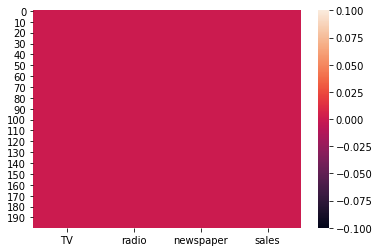

In [527]:
sb.heatmap(data.isnull())

            - NO NULL VALUES

### STEP 2: EDA
    - Univariante Analysis

In [528]:
import warnings
warnings.filterwarnings('ignore')

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

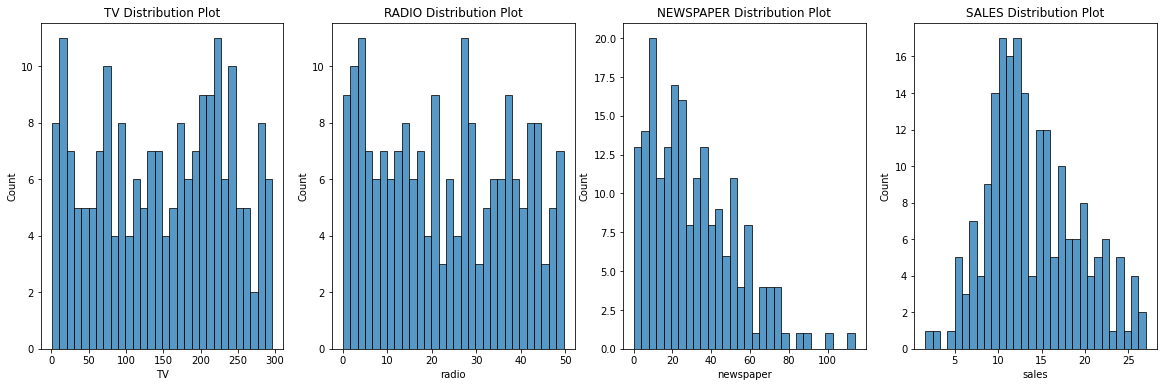

In [529]:
plt.figure(figsize=(20,6))
count = 1
for i in data.columns:
    plt.subplot(1,4,count)
    count = count + 1
    sb.histplot(data[i],bins=30)
    plt.title(i.upper()+ ' Distribution Plot')
    
plt.tight_layout

##### Observations:
    - Newspaper sales is a little left skewed.
    -Tv, radio, sales have gaussian like structure
    
    
#### BOXPLOTS

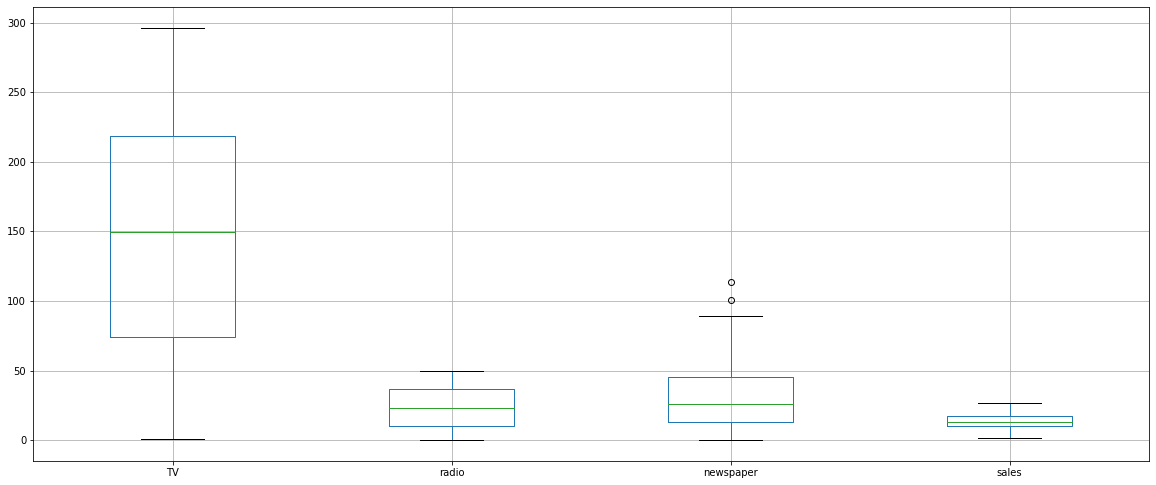

In [530]:
data.iloc[:,0:4].boxplot(figsize=[20,10])
plt.subplots_adjust(bottom=.25)
plt.show()

##### **OBSERVATIONS**
    - Only Newspaper sales have few outliers.
    
    
    
    
  #### BIVARIANTE ANALYSIS

Text(0.5, 1.0, 'TV sales VS Total Sales Generated')

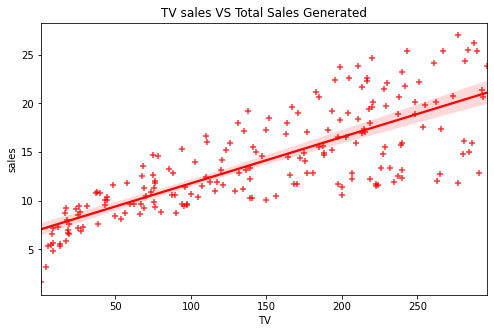

In [531]:
plt.figure(figsize=(8,5))
sb.regplot(data['TV'],data['sales'],color='red',marker='+')
plt.title('TV sales VS Total Sales Generated')

**Linear Relationship can be seen between Sales and TV, and also variance increases with the increase on TV sales giving funnel structure**

Text(0.5, 1.0, 'Radio sales VS Total Sales Generated')

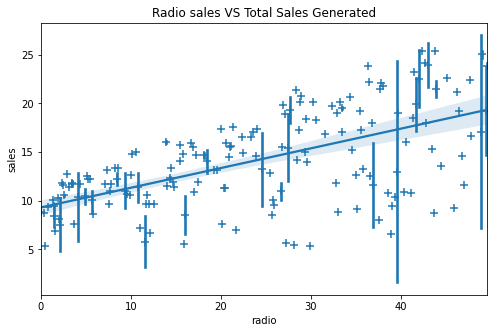

In [532]:
plt.figure(figsize=(8,5))
sb.regplot(x="radio", y="sales", data=data,marker='+',
                 x_estimator=np.mean)
plt.title('Radio sales VS Total Sales Generated')

**as the Radio value increases w.r.t to sales , contanst variance or spread of data also increases**

Text(0.5, 1.0, 'Newspaper sales VS Total Sales Generated')

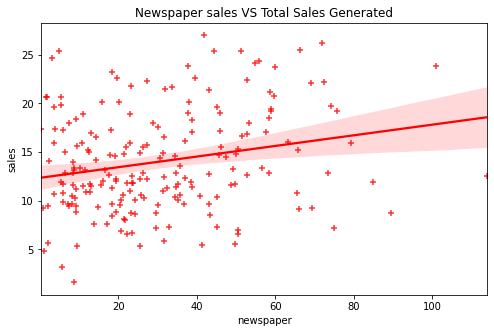

In [533]:
plt.figure(figsize=(8,5))
sb.regplot(data['newspaper'],data['sales'],color='red',marker='+')
plt.title('Newspaper sales VS Total Sales Generated')

**Scatterd Spread of newspaper w.r.t to total sales**


<AxesSubplot:xlabel='newspaper', ylabel='sales'>

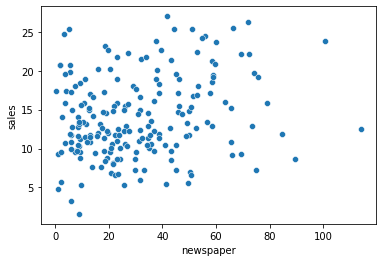

In [534]:
sb.scatterplot(data['newspaper'],data['sales'])

**Less corelation of total sales with Newspaper**

#### MULTIVARIANTE ANALYSIS: Heatmaps, pairplots

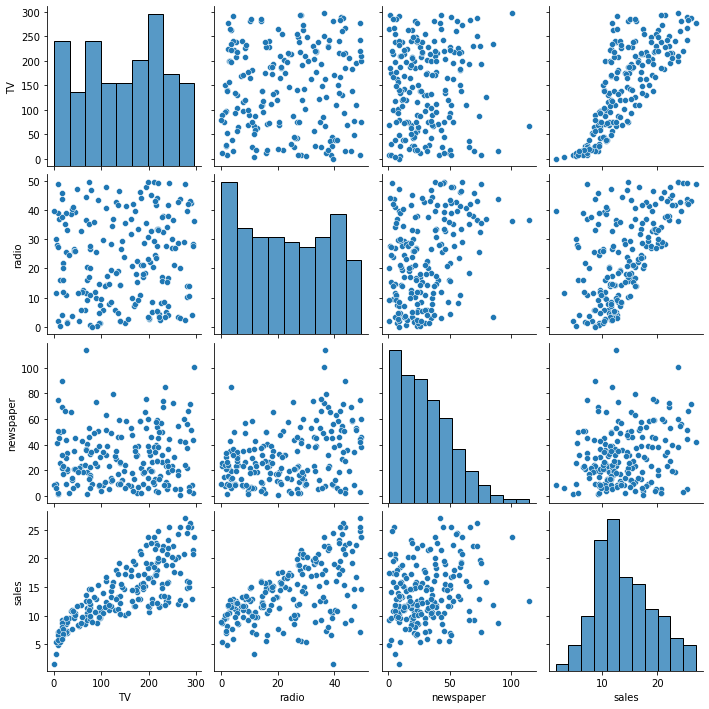

In [535]:
sb.pairplot(data)

##### Observations:
    - Sales and Newspaper have less correlation as data is spread all over.
    - Sales and TV make a funnel structure i.e heteroscedacity which arises due to non constant variance of Data.
 

### Checking Multicollinearity

<AxesSubplot:xlabel='newspaper', ylabel='radio'>

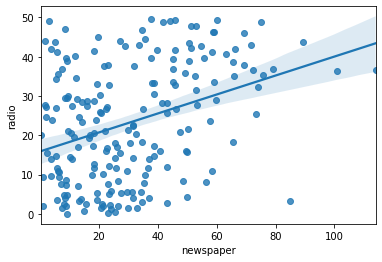

In [536]:
sb.regplot(data['newspaper'],data['radio'])

<AxesSubplot:xlabel='newspaper', ylabel='TV'>

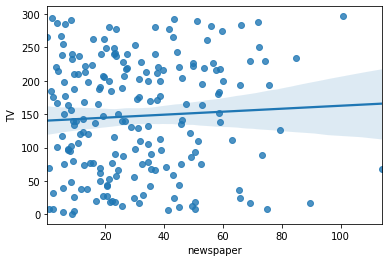

In [537]:
sb.regplot(data['newspaper'],data['TV'])

<AxesSubplot:xlabel='TV', ylabel='radio'>

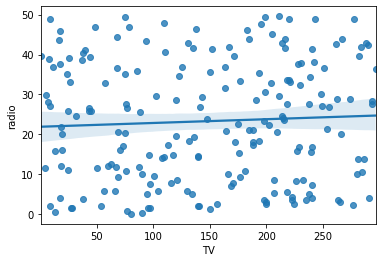

In [538]:
sb.regplot(data['TV'],data['radio'])

**OBSERVATION:  RADIO AND NEWSPaPER HAVE SOME COLLINEARITY **


### Correlation Map and Table

<AxesSubplot:>

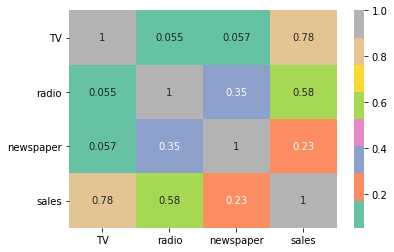

In [539]:
sb.heatmap(data.corr(),cmap='Set2',annot=True)

#### Observations:
    - Sales is Highly correlated with TV, then Radio and least with newspaper.
    -  moderate corelation between newspaper and radio.

### STEP 3: DATA CLEANING
    - Outlier Detection / Outlier Treament with Zscore method
    - skewness treatment, if Present.
    - Scaling the Data.

In [540]:
from scipy.stats import zscore 

In [603]:
data1 = data

In [604]:
scores = np.abs(zscore(data1))

In [605]:
np.where(scores>3)

(array([ 16, 101], dtype=int64), array([2, 2], dtype=int64))

In [606]:
data1 = data1[np.abs(scores<3).all(axis=1)]

In [607]:
data1

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


**Observation:   1% Data Loss**

##### CHECKING SKEWNESS

In [609]:
data1.skew()

TV          -0.082332
radio        0.114842
newspaper    0.650112
sales        0.407130
dtype: float64

In [610]:
y = data1['sales']

In [611]:
data1.drop('sales',inplace=True,axis=1)

As No skewness is Present after applying Sqrt method to remove skewness for newspaper column, Apply Standard Scalar

In [613]:
data1.reset_index()

,index,TV,radio,newspaper
0,0,230.1,37.8,69.2
1,1,44.5,39.3,45.1
2,2,17.2,45.9,69.3
3,3,151.5,41.3,58.5
4,4,180.8,10.8,58.4
...,...,...,...,...
193,195,38.2,3.7,13.8
194,196,94.2,4.9,8.1
195,197,177.0,9.3,6.4
196,198,283.6,42.0,66.2


### PREPROCESSING

In [614]:
from sklearn.preprocessing import PowerTransformer

In [615]:
power = PowerTransformer()

In [551]:
features = power.fit_transform(data1)

In [618]:
transformed_data = pd.DataFrame(features,columns=['Tv','radio','newspaper'])

In [621]:
transformed_data.skew()

Tv          -0.082332
radio        0.114842
newspaper   -0.040649
dtype: float64

##### DATA CLEANING AND STANDARDIZING DATA IS DONE

### STEP 4: MODELING

In [459]:
from sklearn.model_selection import GridSearchCV,cross_val_score,train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.svm import SVR 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error

In [623]:
randomstate = 0
max_score = 0
lr = SVR()
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(transformed_data,y,test_size=.25,random_state=i)
    lr.fit(x_train,y_train)
    pred = lr.predict(x_test)
    score = r2_score(y_test,pred)    
    if(score>max_score):
        max_score = score
        randomstate  = i
print( 'Random State=',randomstate,' and R2 Score of The MODEL : ',max_score*100)

Random State= 163  and R2 Score of The MODEL :  96.68566701463595


In [624]:
x_train,x_test,y_train,y_test = train_test_split(trans,y,test_size=.25,random_state=randomstate)

**RAndom State Choosen is 163**



### 4.1 Linear Regression

In [625]:
cv_scores = []
r2_scores = []
rmse_scores=[]

-----------------Linear Regression--------------------
R2 Score :  0.8681089556477657
Training Score with Cross Validation :  0.8857406146589945
Mean Sqaured Error 2.1372279006416033
Root Mean  Sqaured Error 1.4619260927425857
Mean Absolute Error 1.0502278823112488


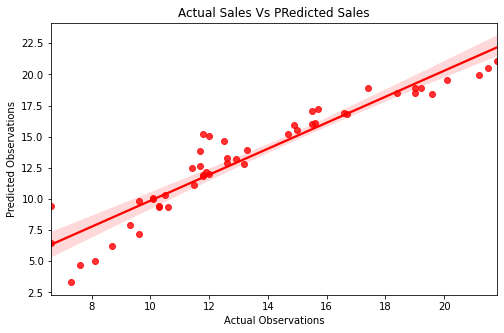

In [663]:
linear_model = LinearRegression()
linear_model.fit(x_train,y_train)
pred_lr = linear_model.predict(x_test)
print('-----------------Linear Regression--------------------')
print('R2 Score : ',r2_score(y_test,pred_lr))
r2_scores.append(r2_score(y_test,pred_lr))
print('Training Score with Cross Validation : ',np.mean(cross_val_score(linear_model,x,y,cv=5,scoring='r2')))
cv_scores.append(np.mean(cross_val_score(linear_model,x,y,cv=5,scoring='r2')))
print('Mean Sqaured Error',mean_squared_error(y_test,pred_lr))
rmse_scores.append(np.sqrt(mean_squared_error(y_test,pred_lr)))
print('Root Mean  Sqaured Error',np.sqrt(mean_squared_error(y_test,pred_lr)))
print('Mean Absolute Error',mean_absolute_error(y_test,pred_lr))

#plt.scatter(x_test, y_test,  color='gray')
plt.figure(figsize=(8,5))
sb.regplot(y_test, pred_lr, color='red')
plt.title('Actual Sales Vs PRedicted Sales')
plt.xlabel('Actual Observations')
plt.ylabel('Predicted Observations')
plt.show()

##### **OBSERVATION :** 
       
    - THe actual vlaues and predicted vlaues should lie close to to the line forming a linear realtion ship which can be observed, less variance between telling us that the model is working correctly.

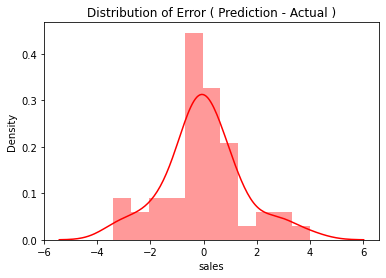

In [627]:
sb.distplot((y_test- pred_lr), color='red')
plt.title('Distribution of Error ( Prediction - Actual )')
plt.show()

#### Error metrics following a gaussuan like Structure.

### 4.2 L2 Regularization : Ridge

-----------------Ridge Regularization Model --------------------
R2 Score :  0.8701034788668934
Training Score with Cross Validation :  0.8858278340182535
Mean Sqaured Error 2.1049076571153407
Root Mean  Sqaured Error 1.4508299890460428
Mean Absolute Error 1.0439757928489188


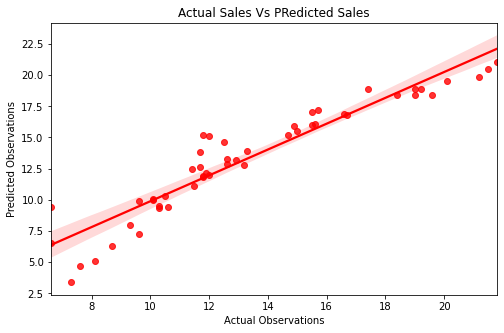

In [628]:
ridge = Ridge()
ridge.fit(x_train,y_train)
pred_lr = ridge.predict(x_test)
print('-----------------Ridge Regularization Model --------------------')
print('R2 Score : ',r2_score(y_test,pred_lr))
r2_scores.append(r2_score(y_test,pred_lr))
print('Training Score with Cross Validation : ',np.mean(cross_val_score(ridge,x,y,cv=5,scoring='r2')))
cv_scores.append(np.mean(cross_val_score(ridge,x,y,cv=5,scoring='r2')))
print('Mean Sqaured Error',mean_squared_error(y_test,pred_lr))
rmse_scores.append(np.sqrt(mean_squared_error(y_test,pred_lr)))
print('Root Mean  Sqaured Error',np.sqrt(mean_squared_error(y_test,pred_lr)))
print('Mean Absolute Error',mean_absolute_error(y_test,pred_lr))

#plt.scatter(x_test, y_test,  color='gray')
plt.figure(figsize=(8,5))
sb.regplot(y_test, pred_lr, color='red')
plt.title('Actual Sales Vs PRedicted Sales')
plt.xlabel('Actual Observations')
plt.ylabel('Predicted Observations')
plt.show()

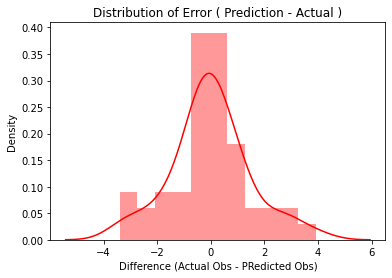

In [629]:
sb.distplot((y_test- pred_lr), color='red')
plt.title('Distribution of Error ( Prediction - Actual )')
plt.xlabel('Difference (Actual Obs - PRedicted Obs)')

plt.show()

### 4.3 L1 LASSO REGULARIZATION MODEL

-----------------Lasso L1 Regularization Model --------------------
R2 Score :  0.858227723228304
Training Score with Cross Validation :  0.8163649691832717
Mean Sqaured Error 2.297348291857842
Root Mean  Sqaured Error 1.5157005943977993
Mean Absolute Error 1.1517027165759735


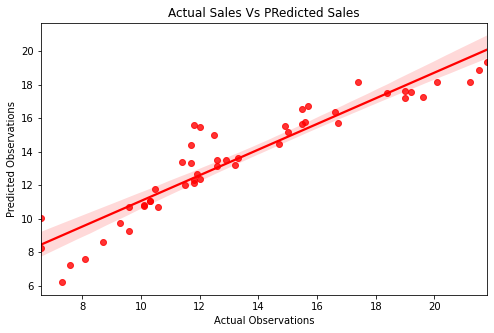

In [630]:
l1 = Lasso()
l1.fit(x_train,y_train)
pred_lr = l1.predict(x_test)
print('-----------------Lasso L1 Regularization Model --------------------')
print('R2 Score : ',r2_score(y_test,pred_lr))
r2_scores.append(r2_score(y_test,pred_lr))
print('Training Score with Cross Validation : ',np.mean(cross_val_score(l1,x,y,cv=5,scoring='r2')))
cv_scores.append(np.mean(cross_val_score(l1,x,y,cv=5,scoring='r2')))
print('Mean Sqaured Error',mean_squared_error(y_test,pred_lr))
rmse_scores.append(np.sqrt(mean_squared_error(y_test,pred_lr)))
print('Root Mean  Sqaured Error',np.sqrt(mean_squared_error(y_test,pred_lr)))
print('Mean Absolute Error',mean_absolute_error(y_test,pred_lr))

#plt.scatter(x_test, y_test,  color='gray')
plt.figure(figsize=(8,5))
sb.regplot(y_test, pred_lr, color='red')
plt.title('Actual Sales Vs PRedicted Sales')
plt.xlabel('Actual Observations')
plt.ylabel('Predicted Observations')
plt.show()

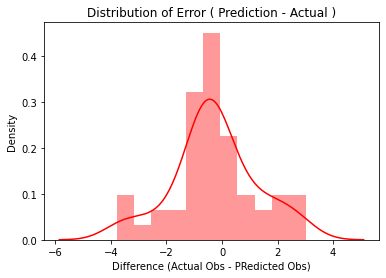

In [631]:
sb.distplot((y_test- pred_lr), color='red')
plt.title('Distribution of Error ( Prediction - Actual )')
plt.xlabel('Difference (Actual Obs - PRedicted Obs)')
plt.show()

### 4.4 Elastic Net Model


-----------------ElasticNet Regularization Model --------------------
R2 Score :  0.8006904926837505
Training Score with Cross Validation :  0.7330654165614591
Mean Sqaured Error 3.229710114068136
Root Mean  Sqaured Error 1.797139425327967
Mean Absolute Error 1.4328988161217524


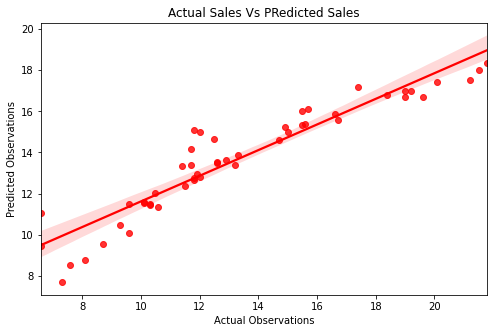

In [632]:
Elasticnet = ElasticNet()
Elasticnet.fit(x_train,y_train)
pred_lr = Elasticnet.predict(x_test)
print('-----------------ElasticNet Regularization Model --------------------')
print('R2 Score : ',r2_score(y_test,pred_lr))
r2_scores.append(r2_score(y_test,pred_lr))
print('Training Score with Cross Validation : ',np.mean(cross_val_score(Elasticnet,x,y,cv=5,scoring='r2')))
cv_scores.append(np.mean(cross_val_score(Elasticnet,x,y,cv=5,scoring='r2')))
print('Mean Sqaured Error',mean_squared_error(y_test,pred_lr))
rmse_scores.append(np.sqrt(mean_squared_error(y_test,pred_lr)))
print('Root Mean  Sqaured Error',np.sqrt(mean_squared_error(y_test,pred_lr)))
print('Mean Absolute Error',mean_absolute_error(y_test,pred_lr))

#plt.scatter(x_test, y_test,  color='gray')
plt.figure(figsize=(8,5))
sb.regplot(y_test, pred_lr, color='red')
plt.title('Actual Sales Vs PRedicted Sales')
plt.xlabel('Actual Observations')
plt.ylabel('Predicted Observations')
plt.show()

### 4.5 SVR

In [633]:
svr = SVR()
params = {
    'kernel': ['rbf','linear'],
    'gamma': [1,.1,10,.01],
    'C': [1,10,100,.1]
}
grid = GridSearchCV(svr,params,cv=5,scoring='r2')

In [634]:
grid.fit(x,y)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [1, 10, 100, 0.1], 'gamma': [1, 0.1, 10, 0.01],
                         'kernel': ['rbf', 'linear']},
             scoring='r2')

In [635]:
grid.best_estimator_

SVR(C=100, gamma=0.1)

-----------------SVR Model --------------------
R2 Score :  0.9944661860837046
Training Score with Cross Validation :  0.9859228109963916
Mean Sqaured Error 0.08967266547135341
Root Mean  Sqaured Error 0.2994539454930481
Mean Absolute Error 0.24650586766095195


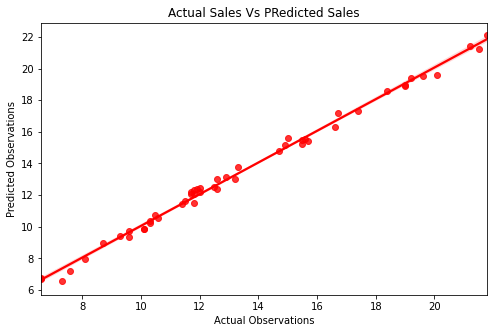

In [636]:
svr = SVR(C=100,gamma=0.1)
svr.fit(x_train,y_train)
pred_lr = svr.predict(x_test)
print('-----------------SVR Model --------------------')
print('R2 Score : ',r2_score(y_test,pred_lr))
r2_scores.append(r2_score(y_test,pred_lr))
print('Training Score with Cross Validation : ',np.mean(cross_val_score(svr,x,y,cv=5,scoring='r2')))
cv_scores.append(np.mean(cross_val_score(svr,x,y,cv=5,scoring='r2')))
print('Mean Sqaured Error',mean_squared_error(y_test,pred_lr))
rmse_scores.append(np.sqrt(mean_squared_error(y_test,pred_lr)))
print('Root Mean  Sqaured Error',np.sqrt(mean_squared_error(y_test,pred_lr)))
print('Mean Absolute Error',mean_absolute_error(y_test,pred_lr))



plt.figure(figsize=(8,5))
sb.regplot(y_test, pred_lr, color='red')
plt.title('Actual Sales Vs PRedicted Sales')
plt.xlabel('Actual Observations')
plt.ylabel('Predicted Observations')
plt.show()

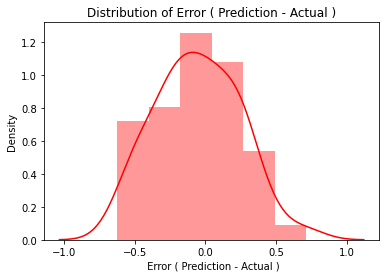

In [637]:
sb.distplot((y_test- pred_lr), color='red')
plt.title('Distribution of Error ( Prediction - Actual )')
plt.xlabel(' Error ( Prediction - Actual )')
plt.show()

### 4.6 KNearestRegressor

In [638]:
knr = KNeighborsRegressor()
params = {
    'n_neighbors': range(1,20),
    'weights': ['uniform','distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}
grid = GridSearchCV(knr,params,cv=5,scoring='r2')

In [639]:
grid.fit(x,y)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': range(1, 20),
                         'weights': ['uniform', 'distance']},
             scoring='r2')

In [640]:
grid.best_params_

{'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'distance'}

-----------------KNearestNeighborsRegressor Model --------------------
R2 Score :  0.9716295137336167
Training Score with Cross Validation :  0.9420661616644759
Mean Sqaured Error 0.45972943122166315
Root Mean  Sqaured Error 0.6780335030230167
Mean Absolute Error 0.5356190846970432


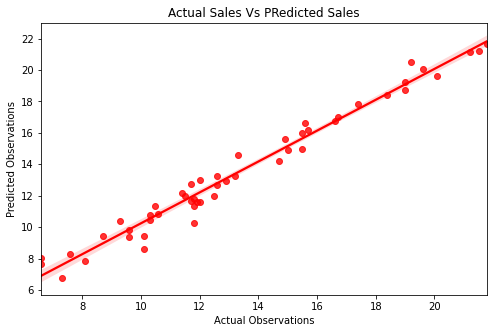

In [641]:
knr = KNeighborsRegressor(n_neighbors=5,algorithm='auto',weights='distance')
knr.fit(x_train,y_train)
pred_lr = knr.predict(x_test)
print('-----------------KNearestNeighborsRegressor Model --------------------')
print('R2 Score : ',r2_score(y_test,pred_lr))
r2_scores.append(r2_score(y_test,pred_lr))
print('Training Score with Cross Validation : ',np.mean(cross_val_score(knr,x,y,cv=5,scoring='r2')))
cv_scores.append(np.mean(cross_val_score(knr,x,y,cv=5,scoring='r2')))
print('Mean Sqaured Error',mean_squared_error(y_test,pred_lr))
rmse_scores.append(np.sqrt(mean_squared_error(y_test,pred_lr)))
print('Root Mean  Sqaured Error',np.sqrt(mean_squared_error(y_test,pred_lr)))
print('Mean Absolute Error',mean_absolute_error(y_test,pred_lr))



plt.figure(figsize=(8,5))
sb.regplot(y_test, pred_lr, color='red')
plt.title('Actual Sales Vs PRedicted Sales')
plt.xlabel('Actual Observations')
plt.ylabel('Predicted Observations')
plt.show()

### 4.7 Decision Tree Regressor

-----------------Decision Tree Regressor Model --------------------
R2 Score :  0.9203060681430635
Training Score with Cross Validation :  0.9476145973349753
Mean Sqaured Error 1.2913999999999999
Root Mean  Sqaured Error 1.136397817667739
Mean Absolute Error 0.9259999999999999


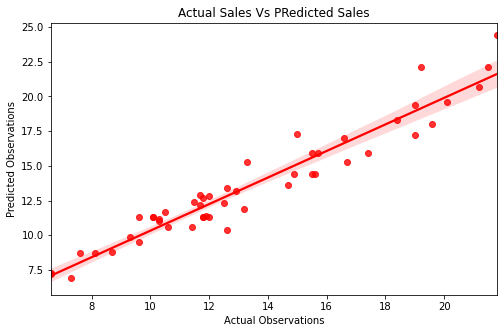

In [642]:
dtr = DecisionTreeRegressor(criterion='mae')
dtr.fit(x_train,y_train)
pred_lr = dtr.predict(x_test)
print('-----------------Decision Tree Regressor Model --------------------')
print('R2 Score : ',r2_score(y_test,pred_lr))
r2_scores.append(r2_score(y_test,pred_lr))
print('Training Score with Cross Validation : ',np.mean(cross_val_score(dtr,x,y,cv=5,scoring='r2')))
cv_scores.append(np.mean(cross_val_score(dtr,x,y,cv=5,scoring='r2')))
print('Mean Sqaured Error',mean_squared_error(y_test,pred_lr))
rmse_scores.append(np.sqrt(mean_squared_error(y_test,pred_lr)))
print('Root Mean  Sqaured Error',np.sqrt(mean_squared_error(y_test,pred_lr)))
print('Mean Absolute Error',mean_absolute_error(y_test,pred_lr))



plt.figure(figsize=(8,5))
sb.regplot(y_test, pred_lr, color='red')
plt.title('Actual Sales Vs PRedicted Sales')
plt.xlabel('Actual Observations')
plt.ylabel('Predicted Observations')
plt.show()

### 4.8 Ensembling Techniques: RandomForestRegressor

In [643]:
params = {
    'criterion': ['mse','mae'],
    
    'n_estimators': range(10,150,10)
    
}
rf = RandomForestRegressor()
grid = GridSearchCV(rf,params,cv=5,scoring='r2')

In [644]:
grid.fit(x,y)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'],
                         'n_estimators': range(10, 150, 10)},
             scoring='r2')

In [645]:
grid.best_estimator_

RandomForestRegressor(criterion='mae', n_estimators=140)

-----------------Random Forest Regressor Model --------------------
R2 Score :  0.9792705321712939
Training Score with Cross Validation :  0.9765161057851062
Mean Sqaured Error 0.3359105785123972
Root Mean  Sqaured Error 0.5795779313538406
Mean Absolute Error 0.4832000000000003


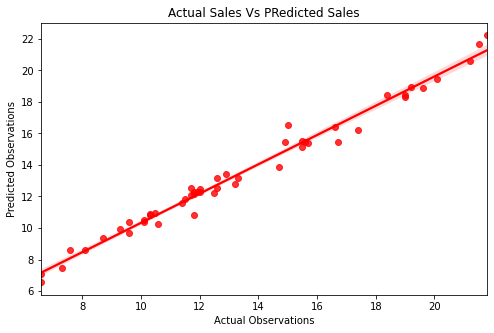

In [646]:
dtr = RandomForestRegressor(n_estimators=110)
dtr.fit(x_train,y_train)
pred_lr = dtr.predict(x_test)
print('-----------------Random Forest Regressor Model --------------------')
print('R2 Score : ',r2_score(y_test,pred_lr))
r2_scores.append(r2_score(y_test,pred_lr))
print('Training Score with Cross Validation : ',np.mean(cross_val_score(dtr,x,y,cv=5,scoring='r2')))
cv_scores.append(np.mean(cross_val_score(dtr,x,y,cv=5,scoring='r2')))
print('Mean Sqaured Error',mean_squared_error(y_test,pred_lr))
rmse_scores.append(np.sqrt(mean_squared_error(y_test,pred_lr)))
print('Root Mean  Sqaured Error',np.sqrt(mean_squared_error(y_test,pred_lr)))
print('Mean Absolute Error',mean_absolute_error(y_test,pred_lr))



plt.figure(figsize=(8,5))
sb.regplot(y_test, pred_lr, color='red')
plt.title('Actual Sales Vs PRedicted Sales')
plt.xlabel('Actual Observations')
plt.ylabel('Predicted Observations')
plt.show()

### 4.9 ADABOOSTREGRESSOR

-----------------Ada Boost Regressor Model --------------------
R2 Score :  0.9377924679407688
Training Score with Cross Validation :  0.9583813652177969
Mean Sqaured Error 1.0080417044236853
Root Mean  Sqaured Error 1.004012800926206
Mean Absolute Error 0.8622581896413527


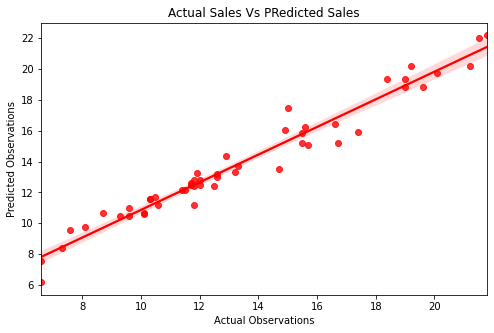

In [647]:
dtr = AdaBoostRegressor(n_estimators=120)
dtr.fit(x_train,y_train)
pred_lr = dtr.predict(x_test)
print('-----------------Ada Boost Regressor Model --------------------')
print('R2 Score : ',r2_score(y_test,pred_lr))
r2_scores.append(r2_score(y_test,pred_lr))
print('Training Score with Cross Validation : ',np.mean(cross_val_score(dtr,x,y,cv=5,scoring='r2')))
cv_scores.append(np.mean(cross_val_score(dtr,x,y,cv=5,scoring='r2')))
print('Mean Sqaured Error',mean_squared_error(y_test,pred_lr))
rmse_scores.append(np.sqrt(mean_squared_error(y_test,pred_lr)))
print('Root Mean  Sqaured Error',np.sqrt(mean_squared_error(y_test,pred_lr)))
print('Mean Absolute Error',mean_absolute_error(y_test,pred_lr))



plt.figure(figsize=(8,5))
sb.regplot(y_test, pred_lr, color='red')
plt.title('Actual Sales Vs PRedicted Sales')
plt.xlabel('Actual Observations')
plt.ylabel('Predicted Observations')
plt.show()

### 4.10 GradientBoosting Regressor

----------------Gradient Boosting Regressor Model --------------------
R2 Score :  0.9723546044106756
Training Score with Cross Validation :  0.9784167186440804
Mean Sqaured Error 0.4479797022456253
Root Mean  Sqaured Error 0.6693128582700509
Mean Absolute Error 0.5532835542082037


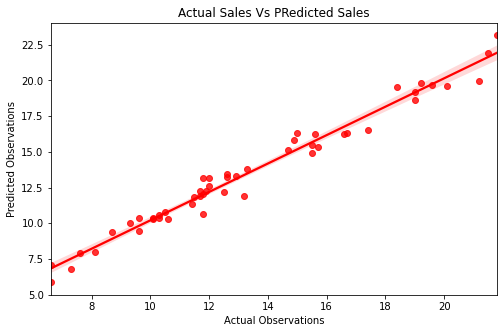

In [648]:
dtr = GradientBoostingRegressor(n_estimators=150)
dtr.fit(x_train,y_train)
pred_lr = dtr.predict(x_test)
print('----------------Gradient Boosting Regressor Model --------------------')
print('R2 Score : ',r2_score(y_test,pred_lr))
r2_scores.append(r2_score(y_test,pred_lr))
print('Training Score with Cross Validation : ',np.mean(cross_val_score(dtr,x,y,cv=5,scoring='r2')))
cv_scores.append(np.mean(cross_val_score(dtr,x,y,cv=5,scoring='r2')))
print('Mean Sqaured Error',mean_squared_error(y_test,pred_lr))
rmse_scores.append(np.sqrt(mean_squared_error(y_test,pred_lr)))
print('Root Mean  Sqaured Error',np.sqrt(mean_squared_error(y_test,pred_lr)))
print('Mean Absolute Error',mean_absolute_error(y_test,pred_lr))



plt.figure(figsize=(8,5))
sb.regplot(y_test, pred_lr, color='red')
plt.title('Actual Sales Vs PRedicted Sales')
plt.xlabel('Actual Observations')
plt.ylabel('Predicted Observations')
plt.show()

In [649]:
diff = []
for i in range(0,10):
    diff.append(np.abs(cv_scores[i]- r2_scores[i]))

In [650]:
tab = {
    'R2 Score': r2_scores, 'Training Score (CV Score)': cv_scores, 'Bias/Variance (Training-Evaluation Score)': diff,
    'RMSE': rmse_scores
}

In [651]:
table = pd.DataFrame(tab,index= ['LinearReg','ridge L2','Lasso L1','ElasticNet','SVR','KNearestRegressor'
                                  ,'DecisionTreeRegressor','RandomForestRegressor',
                                   'AdaBoostRegressor','GradientBoostingRegressor']
                    )

In [652]:
table

,R2 Score,Training Score (CV Score),Bias/Variance (Training-Evaluation Score),RMSE
LinearReg,0.868109,0.885741,0.017632,1.461926
ridge L2,0.870103,0.885828,0.015724,1.450830
Lasso L1,0.858228,0.816365,0.041863,1.515701
ElasticNet,0.800690,0.733065,0.067625,1.797139
SVR,0.994466,0.985923,0.008543,0.299454
KNearestRegressor,0.971630,0.942066,0.029563,0.678034
DecisionTreeRegressor,0.920306,0.947278,0.026972,1.136398
RandomForestRegressor,0.979271,0.976111,0.003160,0.579578
AdaBoostRegressor,0.937792,0.959620,0.021828,1.004013
GradientBoostingRegressor,0.972355,0.978466,0.006112,0.669313


#### OBservations:
    - HIghest Evaluation metrix (r2 score) is for SVR Model with 99.2 % and least RMSE Error amongst all the model and Also, lowest Biass/variance value.

### Evaluating SVR MODEL

In [653]:
svr = SVR()
svr.fit(x_train,y_train)
pred_lr = svr.predict(x_test)
print('-----------------SVR Model --------------------')
print('R2 Score : ',r2_score(y_test,pred_lr))
#r2_scores.append(r2_score(y_test,pred_lr))
print('Training Score with Cross Validation : ',np.mean(cross_val_score(svr,x,y,cv=5,scoring='r2')))
#cv_scores.append(np.mean(cross_val_score(svr,x,y,cv=5,scoring='r2')))
print('Mean Sqaured Error',mean_squared_error(y_test,pred_lr))
#rmse_scores.append(np.sqrt(mean_squared_error(y_test,pred_lr)))
print('Root Mean  Sqaured Error',np.sqrt(mean_squared_error(y_test,pred_lr)))
print('Mean Absolute Error',mean_absolute_error(y_test,pred_lr))



-----------------SVR Model --------------------
R2 Score :  0.9765359979774252
Training Score with Cross Validation :  0.9041170072126675
Mean Sqaured Error 0.3802223269188052
Root Mean  Sqaured Error 0.6166217048716378
Mean Absolute Error 0.47851667891366995


### HYPERTUNING PARAMETERS With GRIDSearchCV

In [654]:
svr = SVR()
params = {
    'kernel': ['rbf','linear'],
    'gamma': [1,.1,10,.01],
    'C': [1,10,100,.1]
}
grid = GridSearchCV(svr,params,cv=5,scoring='r2')

In [655]:
grid.fit(x,y)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [1, 10, 100, 0.1], 'gamma': [1, 0.1, 10, 0.01],
                         'kernel': ['rbf', 'linear']},
             scoring='r2')

In [656]:
grid.best_estimator_

SVR(C=100, gamma=0.1)

In [657]:
svr_final = SVR(C=100, gamma=0.1)
svr_final.fit(x_train,y_train)
pred_svr = svr_final.predict(x_test)
print('-----------------SVR Model --------------------')
print('R2 Score : ',r2_score(y_test,pred_svr))
#r2_scores.append(r2_score(y_test,pred_lr))
print('Training Score with Cross Validation : ',np.mean(cross_val_score(svr_final,x,y,cv=5,scoring='r2')))
#cv_scores.append(np.mean(cross_val_score(svr,x,y,cv=5,scoring='r2')))
print('Mean Sqaured Error',mean_squared_error(y_test,pred_svr))
#rmse_scores.append(np.sqrt(mean_squared_error(y_test,pred_lr)))
print('Root Mean  Sqaured Error',np.sqrt(mean_squared_error(y_test,pred_lr)))
print('Mean Absolute Error',mean_absolute_error(y_test,pred_svr))



-----------------SVR Model --------------------
R2 Score :  0.9944661860837046
Training Score with Cross Validation :  0.9859228109963916
Mean Sqaured Error 0.08967266547135341
Root Mean  Sqaured Error 0.6166217048716378
Mean Absolute Error 0.24650586766095195


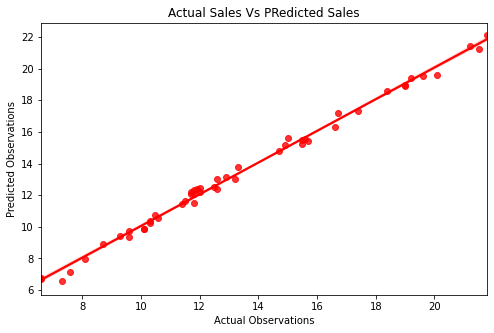

In [658]:
plt.figure(figsize=(8,5))
sb.regplot(y_test, pred_svr, color='red')
plt.title('Actual Sales Vs PRedicted Sales')
plt.xlabel('Actual Observations')
plt.ylabel('Predicted Observations')
plt.show()

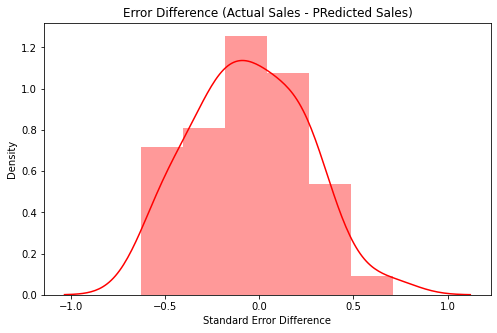

In [659]:
plt.figure(figsize=(8,5))
sb.distplot((y_test- pred_svr), color='red')
plt.title('Error Difference (Actual Sales - PRedicted Sales)')
plt.xlabel('Standard Error Difference')

plt.show()

###### Observations:

    Our SVR model Error follows  gAUSSIAN LIKE STRUCTURE AND LINEAR RELATIONSHIP between actual and predicted values saying that our model is working correctly

### Conclusion
    - SVR model predicts total sales from advertisments MADE IN TV, radio and Newspapers. And this Sales Predicted are with Accuracy of 99.2% and with 0.35 Root mean  Square error.
    
    - Observe that Linear Regression works with 85% accuracy as it is effected by multicollinearity and non constant variance and a little biassed data.

### STEP 5: SAVE AND LOAD MODEL

In [660]:
import joblib 


In [661]:
joblib.dump(svr_final,'sales_prediction_svr_model.pk')

['sales_prediction_svr_model.pk']

In [662]:
joblib.load('sales_prediction_svr_model.pk')

SVR(C=100, gamma=0.1)

####  THANKYOU